# KNN (K-Nearest Neighbors, K-근접 이웃 알고리즘)
- ML 알고리즘 중에서도 분류 및 회귀 문제에 인기있는 지도학습 모델
- Distance 함수, voting 시스템 등을 이해하기 최적의 알고리즘임
- 본 실습에서는 classification(분류) 문제에 초점을 맞추고 진행할 예정

### 알고리즘 overview
- feature 공간 상에서 가장 가까운 'k' 개의 이웃 중 입력되는 데이터의 클래스를 결정하는 voting 시스템
- 예를 들어 아래와 같이 포도와 배를 roundness(둥근 정도) 및 diameter(지름) 두가지 feature로 plot 되어 있다고 가정
- 새로운 과일(붉은색 점)이 주어졌을 때 이와 가장 가까운 k 지점까지 거리를 계산하여 어떤 과일일지 결정
- 예시에서 가장 가까운 3개 점을 측정하면 모두 배(pear)라 할 수 있으므로 새로운 과일도 배라고 판단할 수 있음
![knn_example](https://github.com/keunjaeLee/keunjaeLee/blob/main/securityAI/MDS/week4/knn_example.png?raw=1)

### 알고리즘 동작방식
**알고리즘 동작 순서**
1. k값 선정: k 값을 선정하여 알고리즘의 가장 가까운 이웃의 수로 사용 (하이퍼 파라미터로 튜닝 필요)
2. 거리 계산: 주어진 데이터 포인트에 대해 모든 학습 데이터 포인트까지 거리(유클리드 거리 등)를 계산함
3. k nearest neighbor 찾기: 계산된 거리에 기반해 k개의 최근접 이웃 데이터 포인트를 찾아냄
4. Majority class 결정: k개 최근접 이웃 중 가장 많은 수의 클래스를 선정
5. 예측값 선정: majority class 가 선정된 후 이를 해당 테스트 데이터 포인트의 class로 지정
6. 모든 테스트 데이터 포인트에 대해 이를 반복 (2 - 5)
- KNN의 경우 데이터셋에 대해 직접적인 학습은 진행하지 않으나 모든 학습 데이터를 메모리에 저장 후 예측에 사용함

### Distance Metric (거리측정 척도)
- Scikit learn의 경우 'minkowski' 를 기본 거리 측도로 사용 (여기서는 유클리드 거리)

$$
d(x^{(i)}, x^{(j)}) = \left(\sum_k \left| x_k^{(i)} - x_k^{(j)} \right|^p\right)^{1/p}
$$

- $l$2 distance (Euclidean distance): $d(x_1, x_2) = \left(\sum_{i=1}^n |x_1 - x_2|^2\right)^{1/2}$
![euclidean](https://github.com/keunjaeLee/keunjaeLee/blob/main/securityAI/MDS/week4/euclidean.png?raw=1)

- $l$1 distance: $d(x_1, x_2) = \sum_{i=1}^n |x_1 - x_2|$


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Toy example

### - make_blobs 함수를 이용한 toy example 생성

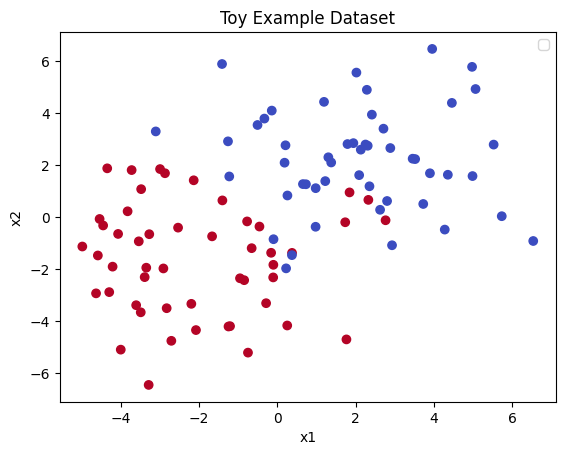

In [3]:
from sklearn.datasets import make_blobs
# Toy example 생성
X, y = make_blobs(n_samples=100, n_features=2, centers=[[2,2],[-2,-2]], cluster_std=2.0, random_state=0)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0)

# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Example Dataset')
plt.legend()
plt.show()

## Toy example KNN 학습 및 평가

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# 학습 데이터셋/평가 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# knn 모델 학습 (k=3 으로 설정)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 학습된 knn 모델 평
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


## 붓꽃 데이터를 이용한 학습 / 평가

In [7]:
from sklearn import datasets
from sklearn import neighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# iris data load, 꽃잎 길이와 너비 출력
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

# 학습/테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# KNN 모델
knn_clf = Pipeline([("scaler", StandardScaler()), ("linear_svc", KNeighborsClassifier(n_neighbors=5, metric='minkowski'))])
# KNN 학습
knn_clf.fit(X_train,y_train)
# 예측
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

accuracy: 1.0


## 실습 문제
#### - KNNClassifier를 사용하여 저번 실습 시간에 사용한 HA 데이터셋 분류 문제 풀어보기

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('../../human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('../../human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('../../human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('../../human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('../../human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
X_train.describe()

문제: 위에서 설명한 KNN Classifier 모델을 사용해 X_train 데이터를 학습하고 test accuracy를 출력하시오.

In [ ]:
## 문제: 위에서 설명한 KNN Classifier 모델을 사용해 X_train 데이터를 학습하고 test accuracy를 출력하시오.

